# Problem Statement 

Output variable -> y
    y -> Whether the client has subscribed a term deposit or not 
    Binomial ("yes" or "no")

In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('bank-full (1).csv', sep=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
#Data description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.shape

(45211, 17)

In [11]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df= pd.get_dummies(df, columns=['job','marital','education','contact','poutcome','month', 'default', 'housing', 'loan','y'], drop_first=True)
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,default_yes,housing_yes,loan_yes,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_blue-collar      45211 non-null  uint8
 8   job_entrepreneur     45211 non-null  uint8
 9   job_housemaid        45211 non-null  uint8
 10  job_management       45211 non-null  uint8
 11  job_retired          45211 non-null  uint8
 12  job_self-employed    45211 non-null  uint8
 13  job_services         45211 non-null  uint8
 14  job_student          45211 non-null  uint8
 15  job_technician       45211 non-null  uint8
 16  job_unemployed       4

# Splitting Data into Traning and Testing Set

In [15]:
x= df.iloc[:,0:42]
y= df['y_yes'] 

In [16]:
x 

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,default_yes,housing_yes,loan_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y_yes, Length: 45211, dtype: uint8

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y, train_size=0.75, random_state=143)

In [20]:
xtrain 

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,default_yes,housing_yes,loan_yes
42493,53,1961,15,351,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12617,30,5956,4,538,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
35941,53,4493,8,286,2,168,3,0,0,0,...,0,0,0,1,0,0,0,0,0,0
27148,45,1738,21,79,1,106,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10932,46,7,17,110,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13231,28,882,8,107,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
25121,30,12569,18,87,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17937,37,0,30,195,4,-1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
34969,30,501,6,323,2,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1


# model Building

In [21]:
from sklearn.linear_model import LogisticRegression 

In [22]:
lg = LogisticRegression()

In [23]:
#Train the model
lg.fit(xtrain,ytrain)

#Prediction
ypred= lg.predict(xtest)

In [24]:
len(xtest)

11303

In [25]:
len(ypred)

11303

In [26]:
# Model Evaluation

In [27]:
print('Actual Y: ', ytest[:35].values)
print('Predict Y:', ypred[:35])

Actual Y:  [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Predict Y: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9981
           1       0.61      0.22      0.33      1322

    accuracy                           0.89     11303
   macro avg       0.76      0.60      0.63     11303
weighted avg       0.87      0.89      0.87     11303



In [30]:
confusion_matrix(ytest, ypred)

array([[9788,  193],
       [1026,  296]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted Values')

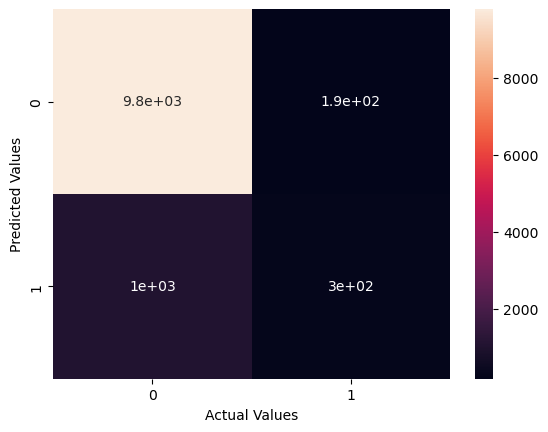

In [31]:
sns.heatmap(confusion_matrix(ytest, ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Threshold Selection

In [32]:
proba = lg.predict_proba(xtest)[:,1]
proba

array([0.00156364, 0.01434784, 0.02204356, ..., 0.06390613, 0.19564943,
       0.30498646])

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

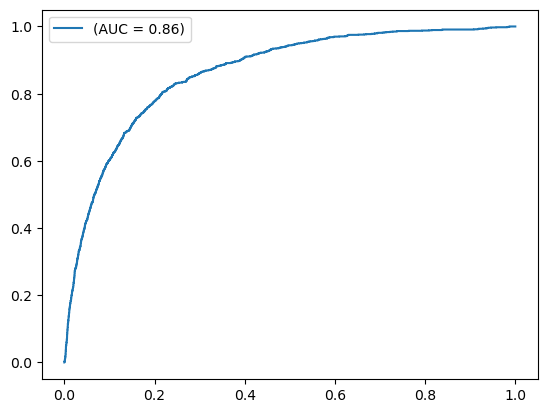

In [34]:
auc = roc_auc_score(ytest,proba)

fpr,tpr, threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [35]:
auc

0.8631335240436407

In [36]:
threshold

array([1.99999987e+00, 9.99999870e-01, 9.99981898e-01, ...,
       1.65718062e-04, 1.65683333e-04, 5.36539031e-16])

In [37]:
len(threshold)

1794

In [38]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)], axis=1)
final_threshold.columns = ['Threshold','Accuracy']

In [39]:
final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
291,4.467811e-01,0.894630
292,4.463619e-01,0.894630
290,4.468314e-01,0.894541
293,4.457255e-01,0.894541
295,4.445985e-01,0.894541
...,...,...
1789,2.030525e-04,0.128992
1790,2.019246e-04,0.128904
1791,1.657181e-04,0.128550
1792,1.656833e-04,0.128461


In [40]:
from sklearn.preprocessing import binarize

In [41]:
y = binarize([proba], threshold=4.466825e-01)[0]
y 

array([0., 0., 0., ..., 0., 0., 0.])

In [42]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9981
           1       0.61      0.27      0.38      1322

    accuracy                           0.89     11303
   macro avg       0.76      0.62      0.66     11303
weighted avg       0.88      0.89      0.88     11303

